In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
desired_width = 360
pd.set_option('display.width', desired_width)

from IPython.display import display, HTML
import datetime

display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
</style>
"""))
plt.rcParams['figure.figsize'] = [16,4]

In [205]:
houseData = pd.read_csv('kc_house_data.csv')

trainDt, testDt = train_test_split(houseData, test_size= 0.2, random_state= 0)
trainDt = pd.read_csv('kc_house_train_data.csv')
testDt = pd.read_csv('kc_house_test_data.csv')

len(trainDt), len(testDt)

(17384, 4229)

In [206]:
trainDt.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Useful SFrame summary functions

In order to make use of the closed form solution as well as take advantage of sklearn built in functions we will review some important ones. In particular:
* Computing the sum of an SArray
* Computing the arithmetic average (mean) of an SArray
* multiplying SArrays by constants
* multiplying SArrays by other SArrays

# Build a generic simple linear regression function 

Write a generic function that accepts a column of data (e.g, an SArray) ‘input_feature’ and another column ‘output’ and returns the Simple Linear Regression parameters ‘intercept’ and ‘slope’. Use the closed form solution from lecture to calculate the slope and intercept. e.g. in python:



In [207]:
def simple_linearRegression(xdt, ydt):
    xdt = np.array(xdt)
    ydt = np.array(ydt)
    n = len(xdt)
    
    xmean = xdt.mean()
    ymean = ydt.mean()
    
    xydt = xdt*ydt
    x_sqrd = xdt*xdt
    a1 = (sum(xydt) - sum(xdt)*ymean)/(sum(x_sqrd) - sum(xdt)*xmean)
    a0 = ymean - a1*xmean
    
    print(a0, a1)
    return a0, a1
    

In [208]:
def simple_linearRegression2(xdt, ydt):
    xdt = np.array(xdt)
    ydt = np.array(ydt)
    n = len(xdt)
    
    xmean = xdt.mean()
    ymean = ydt.mean()
    print(xmean)
    xydt = xdt*ydt
    x_sqrd = xdt*xdt
    a1 = (sum(xydt) - sum(xdt)*ymean)/(sum(x_sqrd) - sum(xdt)*xmean)
    a0 = ymean - a1*xmean
    
    print(a0, a1)
    return a0, a1
    

In [209]:
# regr = LinearRegression()
# regr.fit(trainDt.sqft_living, trainDt.price)

In [210]:
a0, a1 = simple_linearRegression2(trainDt.sqft_living, trainDt.price)
sqft_intercept, sqft_slope = a0, a1

2080.0295098941556
-47116.07907289418 281.9588396303426


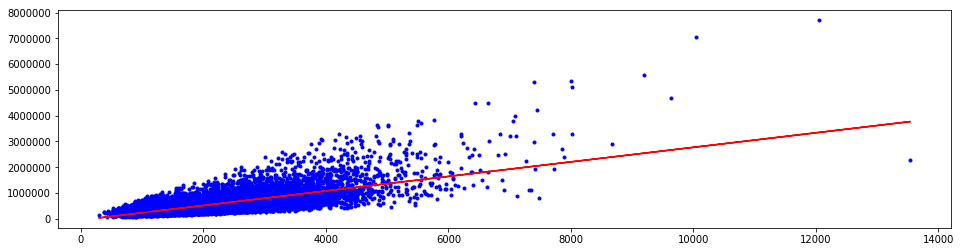

In [211]:
plt.plot(trainDt.sqft_living, trainDt.price, 'b.')
plt.plot(trainDt.sqft_living, a0 + a1*trainDt.sqft_living, 'r-')

#plt.ylim(0,1000000)

# Predicting Values

Now that we have the model parameters: intercept & slope we can make predictions. Using SArrays it's easy to multiply an SArray by a constant and add a constant value. Complete the following function to return the predicted output given the input_feature, slope and intercept:

In [212]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_values = input_feature*slope  + intercept
    return predicted_values

## Testing Prediction on test_data

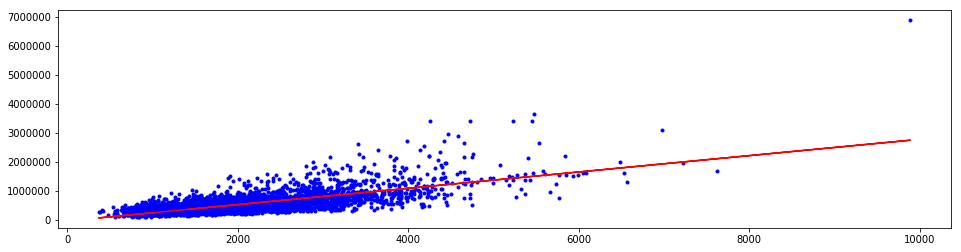

In [213]:
plt.plot(testDt.sqft_living, testDt.price, 'b.')
plt.plot(testDt.sqft_living, a0 + a1*testDt.sqft_living, 'r-')


Now that we can calculate a prediction given the slope and intercept let's make a prediction. Use (or alter) the following to find out the estimated price for a house with 2650 squarefeet according to the squarefeet model we estiamted above.

**Quiz Question: Using your Slope and Intercept from (4), What is the predicted price for a house with 2650 sqft?**

In [215]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print ("The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $700074.85


# Residual Sum of Squares

Now that we have a model and can make predictions let's evaluate our model using Residual Sum of Squares (RSS). Recall that RSS is the sum of the squares of the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output. 

Complete the following (or write your own) function to compute the RSS of a simple linear regression model given the input_feature, output, intercept and slope:

In [216]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    predict_dt = input_feature*slope + intercept
    RSS = sum(np.square(output - predict_dt))
    print(round(RSS,2))
    
    return(RSS)

In [217]:
RSStest = get_residual_sum_of_squares(testDt.sqft_living, testDt.price, sqft_intercept, sqft_slope)

275402933617813.1


In [218]:
RSStrain = get_residual_sum_of_squares(trainDt.sqft_living, trainDt.price, sqft_intercept, sqft_slope)

1201918354177286.2


In [219]:
print('{:.2e}'.format(RSStrain))

1.20e+15


# Predict the squarefeet given price

What if we want to predict the squarefoot given the price? Since we have an equation y = a + b\*x we can solve the function for x. So that if we have the intercept (a) and the slope (b) and the price (y) we can solve for the estimated squarefeet (x).

Complete the following function to compute the inverse regression estimate, i.e. predict the input_feature given the output.

In [220]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = (output - intercept)/slope

    return estimated_feature

Now that we have a function to compute the squarefeet given the price from our simple regression model let's see how big we might expect a house that costs $800,000 to be.

**Quiz Question: According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?**

In [221]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print ("The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 3004


# New Model: estimate prices from bedrooms

We have made one model for predicting house prices using squarefeet, but there are many other features in the sales SFrame. 
Use your simple linear regression function to estimate the regression parameters from predicting Prices based on number of bedrooms. Use the training data!

In [172]:
a0, a1 = simple_linearRegression(trainDt.bedrooms, trainDt.price)
bedroom_intercept, bedroom_slope = a0, a1

137319.20125577622 119192.83278917654


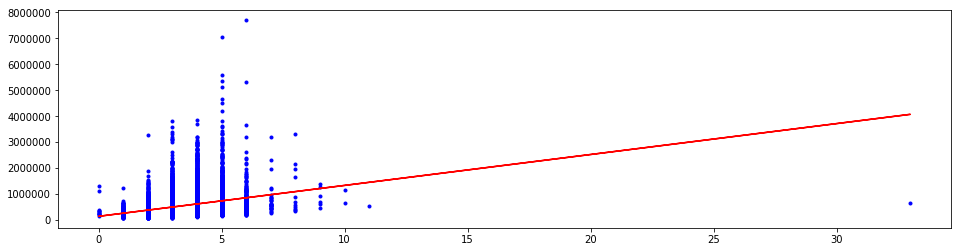

In [173]:
plt.plot(trainDt.bedrooms, trainDt.price, 'b.')
plt.plot(trainDt.bedrooms, a0 + a1*trainDt.bedrooms, 'r-')


In [174]:
RSStest2 = get_residual_sum_of_squares(testDt.bedrooms, testDt.price, bedroom_intercept, bedroom_slope)

555888252800881.0


In [175]:
RSStrain2 = get_residual_sum_of_squares(trainDt.bedrooms, trainDt.price, bedroom_intercept, bedroom_slope)

2080210073676794.5


In [176]:
print('{:.2e}'.format(RSStrain2))

2.08e+15


In [177]:
estimated_bedrooms = inverse_regression_predictions(my_house_price, bedroom_intercept, bedroom_slope)

In [178]:
int(estimated_bedrooms)

5

In [179]:
round(2.2342423,4)

2.2342

In [180]:
a = pd.Series([1,3,4,5,6])
a.dot(a)


87

In [52]:
np.square(a)

array([ 1,  9, 16, 25, 36], dtype=int32)

In [22]:
a = np.array([1,3,4,5,6])
b = np.array([1,1,2,1,2])
a.dot(b)

29

In [20]:
np.dot(a,a)

87

In [23]:
a*b

array([ 1,  3,  8,  5, 12])